# Setting Up the Environment


In [ ]:
# This code allows for multiple outputs to be shown in the same cell rather than the last output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
%matplotlib inline

%config Completer.use_jedi = False

%load_ext autoreload
%autoreload 2

In [ ]:
!pip install sealion
!pip install seaborn
!pip install nba_api
!pip install itables

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.7/261.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.5/162.5 kB 15.6 MB/s eta 0:00:00
  Attempting uninstall: certifi
    Found existing installation: certifi 2024.2.2
    Uninstalling certifi-2024.2.2:
      Successfully uninstalled certifi-2024.2.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.6/215.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# install basic libraries
import numpy as np
import pandas as pd
import json
import difflib
import time
import requests
import ast
import datetime
from functools import reduce
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from pandas.api.types import CategoricalDtype
import plotly.express as px
import seaborn as sns
import scipy.stats as ss
from tqdm import tqdm
import statsmodels.api as sm
import string
from time import time, perf_counter, perf_counter_ns
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

# install correct libraries
from nba_api.stats.static import teams, players
from nba_api.stats.library.parameters import ContextMeasureDetailed, SeasonAll, SeasonTypeAllStar, SeasonTypePlayoffs, MeasureTypeDetailed, SeasonType
from nba_api.stats.endpoints import leaguegamefinder, boxscoretraditionalv2, cumestatsteamgames, cumestatsteam, gamerotation, boxscoreadvancedv3, teamgamelogs, teamestimatedmetrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, Ridge, LogisticRegression, SGDClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import multiprocessing
from sklearn.metrics import confusion_matrix, precision_recall_curve, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import cross_val_predict, cross_val_score, StratifiedShuffleSplit, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.tree import plot_tree
import xgboost as xgb



In [ ]:
np.seterr(divide='ignore')
pd.options.display.max_colwidth = 150

CPUS = multiprocessing.cpu_count()
TOL = 1.0e-12
SEED = 24
plt.rcParams.update({'font.size': 16})

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# Sourcing Data

Collecting Game Data from the NBA stats api

In [ ]:
# Finding a series of games of wins and losses for different teams
gamefinder = leaguegamefinder.LeagueGameFinder()
games = gamefinder.get_data_frames()[0]

In [ ]:
games

SEASON_ID     TEAM_ID TEAM_ABBREVIATION                  TEAM_NAME  \
0         42023  1610612747               LAL         Los Angeles Lakers   
1         42023  1610612760               OKC      Oklahoma City Thunder   
2         42023  1610612748               MIA                 Miami Heat   
3         42023  1610612740               NOP       New Orleans Pelicans   
4         42023  1610612738               BOS             Boston Celtics   
...         ...         ...               ...                        ...   
29995     22019  1610612745               HOU            Houston Rockets   
29996     22019         209               HTG             Hawks Talon GC   
29997     22019  1610612760               OKC      Oklahoma City Thunder   
29998     22019         205               CCG   Celtics Crossover Gaming   
29999     22019  1610612762               UTA                  Utah Jazz   

          GAME_ID   GAME_DATE      MATCHUP WL  MIN  PTS  ...  FT_PCT  OREB  \
0      0042300155  2024-04-29    LAL @ DEN  L  240  106  ...   0.667    11   
1      0042300144  2024-04-29    OKC @ NOP  W  239   97  ...   0.625     8   
2      0042300104  2024-04-29  MIA vs. BOS  L  240   88  ...   0.750     8   
3      0042300144  2024-04-29  NOP vs. OKC  L  241   89  ...   0.850    12   
4      0042300104  2024-04-29    BOS @ MIA  W  240  102  ...   0.889    11   
...           ...         ...          ... ..  ...  ...  ...     ...   ...   
29995  1521900062  2019-07-11  HOU vs. UTA  W  199   87  ...   0.643     7   
29996  1221900147  2019-07-11  HTG vs. KNX  L  120   67  ...     NaN     4   
29997  1521900061  2019-07-11  OKC vs. POR  W  199   92  ...   0.727     9   
29998  1221900149  2019-07-11    CCG @ LKG  W  120   65  ...   0.833    11   
29999  1521900062  2019-07-11    UTA @ HOU  L  202   78  ...   0.571    13   

       DREB  REB  AST  STL  BLK  TOV  PF  PLUS_MINUS  
0        30   41   30    7    6    8  12        -2.0  
1        36   44   18    9    7   14  18         8.0  
2        34   42   17    4    3   13  18       -14.0  
3        38   50   22   10    8   18  25        -8.0  
4        35   46   21    5    3   10  20        14.0  
...     ...  ...  ...  ...  ...  ...  ..         ...  
29995    23   30   21   12    2   13  14        12.8  
29996    12   16   18    9    4   19  12       -12.0  
29997    31   40   17    7    4   15  20         6.0  
29998     8   19   11   15    2   15  10         5.0  
29999    32   45   21    6    3   21  19       -11.8  

[30000 rows x 28 columns]

In [ ]:
# Finding season ratings to each team as viable factors on why they won or lost
ratingsfinder = teamestimatedmetrics.TeamEstimatedMetrics()
ratings = ratingsfinder.get_data_frames()[0]

In [ ]:
ratings.shape
ratings

(30, 30)

TEAM_NAME     TEAM_ID  GP   W   L  W_PCT     MIN  \
0       Washington Wizards  1610612764  82  15  67  0.183  3946.0   
1           Indiana Pacers  1610612754  82  47  35  0.573  3941.0   
2        San Antonio Spurs  1610612759  82  22  60  0.268  3966.0   
3       Los Angeles Lakers  1610612747  82  47  35  0.573  3971.0   
4            Atlanta Hawks  1610612737  82  36  46  0.439  3971.0   
5         Dallas Mavericks  1610612742  82  50  32  0.610  3941.0   
6    Oklahoma City Thunder  1610612760  82  57  25  0.695  3961.0   
7          Milwaukee Bucks  1610612749  82  49  33  0.598  3961.0   
8          Detroit Pistons  1610612765  82  14  68  0.171  3951.0   
9                Utah Jazz  1610612762  82  31  51  0.378  3961.0   
10         Toronto Raptors  1610612761  82  25  57  0.305  3961.0   
11   Golden State Warriors  1610612744  82  46  36  0.561  3966.0   
12         Houston Rockets  1610612745  82  41  41  0.500  3971.0   
13        Sacramento Kings  1610612758  82  46  36  0.561  3971.0   
14            Phoenix Suns  1610612756  82  49  33  0.598  3956.0   
15       Memphis Grizzlies  1610612763  82  27  55  0.329  3956.0   
16    New Orleans Pelicans  1610612740  82  49  33  0.598  3941.0   
17      Philadelphia 76ers  1610612755  82  47  35  0.573  3956.0   
18  Portland Trail Blazers  1610612757  82  21  61  0.256  3976.0   
19             LA Clippers  1610612746  82  51  31  0.622  3941.0   
20          Boston Celtics  1610612738  82  64  18  0.780  3966.0   
21     Cleveland Cavaliers  1610612739  82  48  34  0.585  3961.0   
22  Minnesota Timberwolves  1610612750  82  56  26  0.683  3961.0   
23           Brooklyn Nets  1610612751  82  32  50  0.390  3961.0   
24       Charlotte Hornets  1610612766  82  21  61  0.256  3946.0   
25           Orlando Magic  1610612753  82  47  35  0.573  3956.0   
26          Denver Nuggets  1610612743  82  57  25  0.695  3941.0   
27           Chicago Bulls  1610612741  82  39  43  0.476  3996.0   
28              Miami Heat  1610612748  82  46  36  0.561  3951.0   
29         New York Knicks  1610612752  82  50  32  0.610  3946.0   

    E_OFF_RATING  E_DEF_RATING  E_NET_RATING  ...  MIN_RANK  \
0          108.3         116.8          -8.5  ...        23   
1          117.9         115.5           2.5  ...        26   
2          107.5         113.8          -6.3  ...         7   
3          113.6         112.7           0.9  ...         3   
4          114.0         116.7          -2.6  ...         3   
5          115.2         112.6           2.6  ...        26   
6          117.0         109.1           7.9  ...        10   
7          116.0         112.8           3.2  ...        10   
8          107.2         116.0          -8.8  ...        21   
9          112.0         117.7          -5.8  ...        10   
10         109.8         115.8          -6.0  ...        10   
11         114.7         112.4           2.3  ...         7   
12         111.5         110.7           0.9  ...         3   
13         113.8         112.9           0.9  ...         3   
14         114.9         111.5           3.4  ...        17   
15         104.2         111.7          -7.5  ...        17   
16         115.0         110.1           5.0  ...        26   
17         113.8         111.0           2.8  ...        17   
18         105.0         114.5          -9.5  ...         2   
19         116.1         112.3           3.9  ...        26   
20         120.2         109.0          11.2  ...         7   
21         112.8         109.9           2.9  ...        10   
22         113.1         106.2           6.9  ...        10   
23         110.4         113.1          -2.7  ...        10   
24         107.1         117.0          -9.9  ...        23   
25         110.6         108.6           2.0  ...        17   
26         115.6         110.5           5.0  ...        26   
27         112.4         113.2          -0.8  ...         1   
28         111.7         109.5           2.2  ... 

In [ ]:
# Joining season ratings to each individual win for each team
df = pd.merge(games, ratings, on='TEAM_NAME')

In [ ]:
df['TEAM_ABBREVIATION'].nunique() # 30 teams total after the merge, confirming that it represents the NBA teams

30

In [ ]:
df.shape
df.dtypes
df.head(3)

(13725, 57)

SEASON_ID             object
TEAM_ID_x              int64
TEAM_ABBREVIATION     object
TEAM_NAME             object
GAME_ID               object
GAME_DATE             object
MATCHUP               object
WL                    object
MIN_x                  int64
PTS                    int64
FGM                    int64
FGA                    int64
FG_PCT               float64
FG3M                   int64
FG3A                   int64
FG3_PCT              float64
FTM                    int64
FTA                    int64
FT_PCT               float64
OREB                   int64
DREB                   int64
REB                    int64
AST                    int64
STL                    int64
BLK                    int64
TOV                    int64
PF                     int64
PLUS_MINUS           float64
TEAM_ID_y              int64
GP                     int64
W                      int64
L                      int64
W_PCT                float64
MIN_y                float64
E_OFF_RATING         float64
E_DEF_RATING         float64
E_NET_RATING         float64
E_PACE               float64
E_AST_RATIO          float64
E_OREB_PCT           float64
E_DREB_PCT           float64
E_REB_PCT            float64
E_TM_TOV_PCT         float64
GP_RANK                int64
W_RANK                 int64
L_RANK                 int64
W_PCT_RANK             int64
MIN_RANK               int64
E_OFF_RATING_RANK      int64
E_DEF_RATING_RANK      int64
E_NET_RATING_RANK      int64
E_AST_RATIO_RANK       int64
E_OREB_PCT_RANK        int64
E_DREB_PCT_RANK        int64
E_REB_PCT_RANK         int64
E_TM_TOV_PCT_RANK      int64
E_PACE_RANK            int64
dtype: object

SEASON_ID   TEAM_ID_x TEAM_ABBREVIATION           TEAM_NAME     GAME_ID  \
0     42023  1610612747               LAL  Los Angeles Lakers  0042300155   
1     42023  1610612747               LAL  Los Angeles Lakers  0042300154   
2     42023  1610612747               LAL  Los Angeles Lakers  0042300153   

    GAME_DATE      MATCHUP WL  MIN_x  PTS  ...  MIN_RANK  E_OFF_RATING_RANK  \
0  2024-04-29    LAL @ DEN  L    240  106  ...         3                 15   
1  2024-04-27  LAL vs. DEN  W    240  119  ...         3                 15   
2  2024-04-25  LAL vs. DEN  L    240  105  ...         3                 15   

   E_DEF_RATING_RANK  E_NET_RATING_RANK  E_AST_RATIO_RANK  E_OREB_PCT_RANK  \
0                 17                 17                 6               30   
1                 17                 17                 6               30   
2                 17                 17                 6               30   

   E_DREB_PCT_RANK  E_REB_PCT_RANK  E_TM_TOV_PCT_RANK  E_PACE_RANK  
0               12              20                 18            4  
1               12              20                 18            4  
2               12              20                 18            4  

[3 rows x 57 columns]

# Data Cleaning & Transformation

In [ ]:
# Handling Null Values
df.isna().any().sum()
df = df.dropna()

4

In [ ]:
df.shape

(13719, 57)

In [ ]:
# Treating Win/Losses and Integers
df['WL'] = df['WL'].replace({'W': 1, 'L': 0})
df = df.loc[df['WL'] != ' '] # Treating unique cases
df['WL'] = df['WL'].astype(int)
df

<ipython-input-15-108045010a09>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WL'] = df['WL'].astype(int)


SEASON_ID   TEAM_ID_x TEAM_ABBREVIATION           TEAM_NAME     GAME_ID  \
0         42023  1610612747               LAL  Los Angeles Lakers  0042300155   
1         42023  1610612747               LAL  Los Angeles Lakers  0042300154   
2         42023  1610612747               LAL  Los Angeles Lakers  0042300153   
3         42023  1610612747               LAL  Los Angeles Lakers  0042300152   
4         42023  1610612747               LAL  Los Angeles Lakers  0042300151   
...         ...         ...               ...                 ...         ...   
13720     12019  1610612766               CHA   Charlotte Hornets  0011900054   
13721     12019  1610612766               CHA   Charlotte Hornets  0011900040   
13722     12019  1610612766               CHA   Charlotte Hornets  0011900027   
13723     12019  1610612766               CHA   Charlotte Hornets  0011900010   
13724     22019  1610612766               CHA   Charlotte Hornets  1521900073   

        GAME_DATE      MATCHUP  WL  MIN_x  PTS  ...  MIN_RANK  \
0      2024-04-29    LAL @ DEN   0    240  106  ...         3   
1      2024-04-27  LAL vs. DEN   1    240  119  ...         3   
2      2024-04-25  LAL vs. DEN   0    240  105  ...         3   
3      2024-04-22    LAL @ DEN   0    240   99  ...         3   
4      2024-04-20    LAL @ DEN   0    240  103  ...         3   
...           ...          ...  ..    ...  ...  ...       ...   
13720  2019-10-14    CHA @ MEM   1    238  120  ...        23   
13721  2019-10-11  CHA vs. PHI   0    240   87  ...        23   
13722  2019-10-09  CHA vs. MIA   0    242   94  ...        23   
13723  2019-10-06    CHA @ BOS   0    240  106  ...        23   
13724  2019-07-13    CHA @ UTA   1    200   84  ...        23   

       E_OFF_RATING_RANK  E_DEF_RATING_RANK  E_NET_RATING_RANK  \
0                     15                 17                 17   
1                     15                 17                 17   
2                     15                 17                 17   
3                     15                 17                 17   
4                     15                 17                 17   
...                  ...                ...                ...   
13720                 28                 29                 30   
13721                 28                 29                 30   
13722                 28                 29                 30   
13723                 28                 29                 30   
13724                 28                 29                 30   

       E_AST_RATIO_RANK  E_OREB_PCT_RANK  E_DREB_PCT_RANK  E_REB_PCT_RANK  \
0                     6               30               12              20   
1                     6               30               12              20   
2                     6               30               12              20   
3                     6               30               12              20   
4                     6               30               12              20   
...                 ...              ...              ...             ...   
13720                22               27               24              29   
13721                22               27               24              29   
13722                22               27               24              29   
13723                22               27               24              29   
13724                22               27               24              29   

       E_TM_TOV_PCT_RANK  E_PACE_RANK  
0                     18            4  
1                     18            4  
2                     18            4  
3                     18            4  
4                     18            4  
...                  ...          ...  
13720                 21           24  
13721                 21           24  
13722                 21           24  
13723                 21           24  
13724                 21           24  

[13718 rows x 57 columns]

Adding Season Averages of Core Statistics

In [ ]:
grouped_data = df.groupby('TEAM_NAME')
averages = grouped_data[['FG_PCT', 'FG3_PCT', 'FT_PCT','TOV','STL','BLK','REB','PF', 'PLUS_MINUS']].mean().reset_index()


In [ ]:
df = pd.merge(df, averages, on='TEAM_NAME')

In [ ]:
df.shape
df['TEAM_ABBREVIATION'].nunique()

(13718, 66)

30

# Model Training
In this notebook, we will explore various regressions and ML methods to determine which ways are the best at accurately predicting the outcomes of games.

In [ ]:
df.shape
df.columns

(13718, 66)

Index(['SEASON_ID', 'TEAM_ID_x', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN_x', 'PTS', 'FGM', 'FGA', 'FG_PCT_x',
       'FG3M', 'FG3A', 'FG3_PCT_x', 'FTM', 'FTA', 'FT_PCT_x', 'OREB', 'DREB',
       'REB_x', 'AST', 'STL_x', 'BLK_x', 'TOV_x', 'PF_x', 'PLUS_MINUS_x',
       'TEAM_ID_y', 'GP', 'W', 'L', 'W_PCT', 'MIN_y', 'E_OFF_RATING',
       'E_DEF_RATING', 'E_NET_RATING', 'E_PACE', 'E_AST_RATIO', 'E_OREB_PCT',
       'E_DREB_PCT', 'E_REB_PCT', 'E_TM_TOV_PCT', 'GP_RANK', 'W_RANK',
       'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'E_OFF_RATING_RANK',
       'E_DEF_RATING_RANK', 'E_NET_RATING_RANK', 'E_AST_RATIO_RANK',
       'E_OREB_PCT_RANK', 'E_DREB_PCT_RANK', 'E_REB_PCT_RANK',
       'E_TM_TOV_PCT_RANK', 'E_PACE_RANK', 'FG_PCT_y', 'FG3_PCT_y', 'FT_PCT_y',
       'TOV_y', 'STL_y', 'BLK_y', 'REB_y', 'PF_y', 'PLUS_MINUS_y'],
      dtype='object')

In [ ]:
# train size
train_size = 0.75
df_train = df.sample(frac=train_size,replace=False,random_state=SEED)

test_inds = set(df.index) - set(df_train.index)

df_test = df.loc[list(test_inds)]

# tests
assert np.abs(int(df.shape[0]*train_size) - df_train.shape[0]) <= 1
assert df.shape[0] == df_train.shape[0] + df_test.shape[0]

X_train = df_train.drop(columns=['SEASON_ID', 'TEAM_ID_x', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN_x', 'PTS', 'FGM', 'FGA', 'FG_PCT_x',
       'FG3M', 'FTM', 'FT_PCT_x', 'OREB', 'DREB',
       'REB_x', 'AST', 'STL_x', 'BLK_x', 'TOV_x', 'GP', 'W', 'L', 'W_PCT', 'MIN_y', 'PF_x','PLUS_MINUS_x','GP_RANK', 'W_RANK',
       'L_RANK', 'W_PCT_RANK', 'MIN_RANK','E_AST_RATIO', 'E_OREB_PCT',
       'E_DREB_PCT', 'E_TM_TOV_PCT', 'E_OFF_RATING_RANK',
       'E_DEF_RATING_RANK', 'E_NET_RATING_RANK', 'E_AST_RATIO_RANK',
       'E_OREB_PCT_RANK', 'E_DREB_PCT_RANK', 'E_REB_PCT_RANK',
       'E_TM_TOV_PCT_RANK', 'E_PACE_RANK', 'PF_y', 'TOV_y','E_PACE','E_DEF_RATING','FG3_PCT_y', 'STL_y', 'BLK_y', 'FG_PCT_y', 'FG3_PCT_y', 'E_NET_RATING', 'FT_PCT_y',
       'REB_y','FG3A']).assign(const=1)
y_train= df_train.WL

assert X_train.shape[0] == df_train.shape[0]
assert y_train.shape[0] == df_train.shape[0]

X_test = df_test.drop(columns=['SEASON_ID', 'TEAM_ID_x', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN_x', 'PTS', 'FGM', 'FGA', 'FG_PCT_x',
       'FG3M', 'FTM', 'FT_PCT_x', 'OREB', 'DREB',
       'REB_x', 'AST', 'STL_x', 'BLK_x', 'TOV_x', 'GP', 'W', 'L', 'W_PCT', 'MIN_y', 'PF_x', 'PLUS_MINUS_x','GP_RANK', 'W_RANK',
       'L_RANK', 'W_PCT_RANK', 'MIN_RANK','E_AST_RATIO', 'E_OREB_PCT',
       'E_DREB_PCT', 'E_TM_TOV_PCT','E_OFF_RATING_RANK',
       'E_DEF_RATING_RANK', 'E_NET_RATING_RANK', 'E_AST_RATIO_RANK',
       'E_OREB_PCT_RANK', 'E_DREB_PCT_RANK', 'E_REB_PCT_RANK',
       'E_TM_TOV_PCT_RANK', 'E_PACE_RANK', 'PF_y','TOV_y','E_PACE','E_DEF_RATING', 'FG3_PCT_y', 'STL_y', 'BLK_y','FG_PCT_y','E_NET_RATING', 'FT_PCT_y',
       'REB_y','FG3A']).assign(const=1)
y_test= df_test.WL
assert X_test.shape[0] == df_test.shape[0]
assert y_test.shape[0] == df_test.shape[0]

In [ ]:
list_cts_vars = [
       'E_OFF_RATING', 'PLUS_MINUS_y', 'E_REB_PCT', 'FTA', 'FG3_PCT_x'
        ]

# Visualizations and EDA

In [ ]:
tr=df_train[list_cts_vars].mean()
print(tr)
te=df_test[list_cts_vars].mean()
print(te)
t=df[list_cts_vars].mean()
print(t)
pd.concat((t,tr,te),axis=1,keys=['all','train','test']).style.format("{:.2f}")

E_OFF_RATING    112.585712
PLUS_MINUS_y      0.087873
E_REB_PCT         0.500185
FTA              22.441777
FG3_PCT_x         0.356994
dtype: float64
E_OFF_RATING    112.631224
PLUS_MINUS_y      0.023838
E_REB_PCT         0.500358
FTA              22.565306
FG3_PCT_x         0.356122
dtype: float64
E_OFF_RATING    112.597091
PLUS_MINUS_y      0.071862
E_REB_PCT         0.500228
FTA              22.472664
FG3_PCT_x         0.356776
dtype: float64


,all,train,test
E_OFF_RATING,112.60,112.59,112.63
PLUS_MINUS_y,0.07,0.09,0.02
E_REB_PCT,0.50,0.50,0.50
FTA,22.47,22.44,22.57
FG3_PCT_x,0.36,0.36,0.36


<Figure size 800x600 with 0 Axes>

<Axes: xlabel='E_OFF_RATING', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of E_OFF_RATING')

Text(0.5, 0, 'E_OFF_RATING')

Text(0, 0.5, 'Frequency')

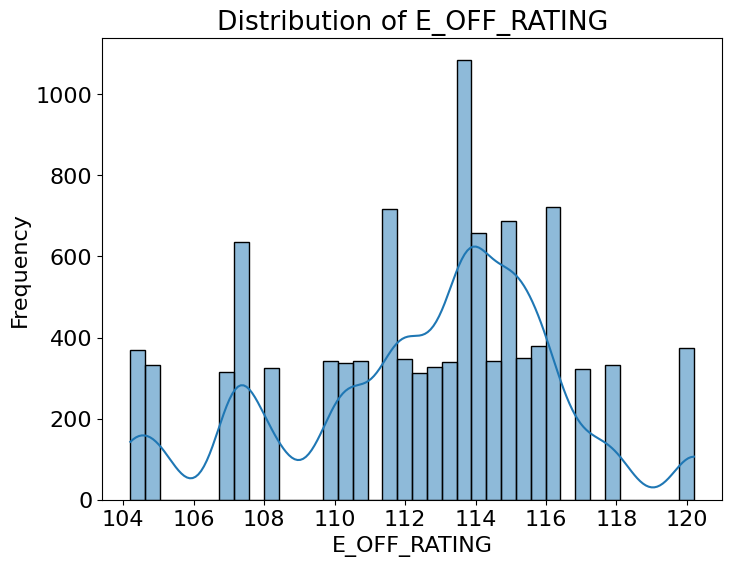

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='PLUS_MINUS_y', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of PLUS_MINUS_y')

Text(0.5, 0, 'PLUS_MINUS_y')

Text(0, 0.5, 'Frequency')

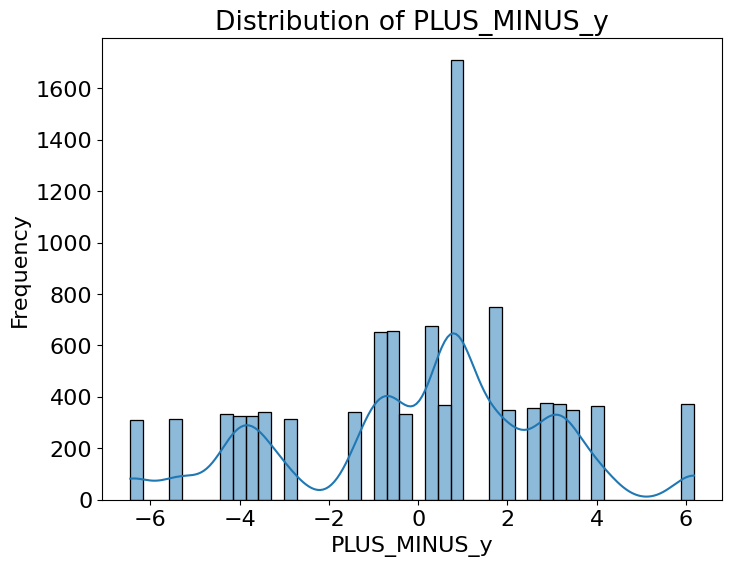

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='E_REB_PCT', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of E_REB_PCT')

Text(0.5, 0, 'E_REB_PCT')

Text(0, 0.5, 'Frequency')

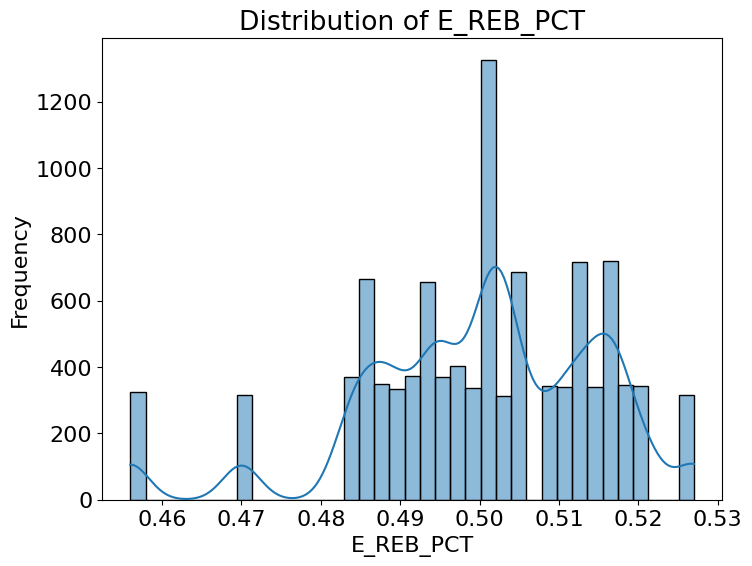

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='FTA', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of FTA')

Text(0.5, 0, 'FTA')

Text(0, 0.5, 'Frequency')

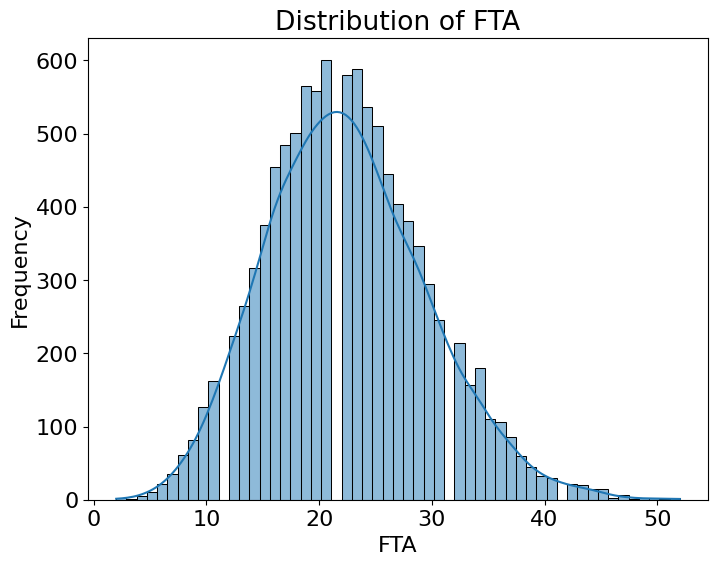

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='FG3_PCT_x', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of FG3_PCT_x')

Text(0.5, 0, 'FG3_PCT_x')

Text(0, 0.5, 'Frequency')

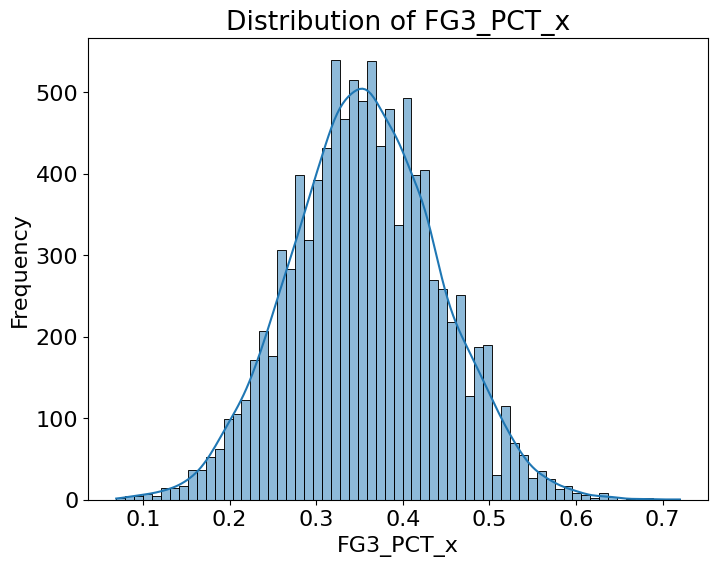

In [ ]:
# Visualize distribution of numerical columns
for col in list_cts_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_train[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()




# Modeling

## Linear Probability

In [ ]:
xall = pd.Series(dtype='float')
for v in list_cts_vars:
    res = sm.OLS(df_train['WL'], sm.add_constant(df_train[v])).fit()
    x = pd.Series(np.hstack((res.params.values,res.tvalues.values[-1:])), name=v) #-1 : last element
    xall = pd.concat((xall,x),axis=1)

print(xall)
xall = (
    xall
    .drop(columns=0)
    .T
    .rename(columns={0:'Constant',1:'Beta',2:'t-stat of the beta'})
    #.assign(Success=lambda x: x.Success + x.Fail)
)
xall.style.format('{:,.2f}')

    0  E_OFF_RATING  PLUS_MINUS_y  E_REB_PCT       FTA  FG3_PCT_x
0 NaN     -1.271202      0.497623  -0.583920  0.366981  -0.244968
1 NaN      0.015735      0.030371   2.167623  0.005940   2.087597
2 NaN     12.043180     18.055246   6.544618  8.593203  38.534301


,Constant,Beta,t-stat of the beta
E_OFF_RATING,-1.27,0.02,12.04
PLUS_MINUS_y,0.50,0.03,18.06
E_REB_PCT,-0.58,2.17,6.54
FTA,0.37,0.01,8.59
FG3_PCT_x,-0.24,2.09,38.53


## Logistic Regression

### Predict

In [ ]:
# Instanitate
logit_cls = LogisticRegression(penalty='l2', #l2 default, Ridge regularization w^2
                               fit_intercept=False, # data include intercept
                               solver='newton-cg',
                               max_iter=500,
                               multi_class='ovr')

# Estimate
logit_cls.fit(X_train,y_train)

# Prediction
yhati = logit_cls.predict(X_train)
print(yhati) #a series of 0s and 1s

# Model score
#accuracy is defined as: (fraction of correct predictions): correct predictions / total number of data points
mod_score = logit_cls.score(X_train,y_train)
print(f"Model score: {mod_score:.3%}")

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


LogisticRegression(fit_intercept=False, max_iter=500, multi_class='ovr',
                   solver='newton-cg')

[0 1 0 ... 1 0 0]
Model score: 66.427%


In [ ]:
y_train.mean() # Makes sense because the data covers both wins and losses, the wins and losses mirrors itself
               # For every team that wins, there must be a team that losses and that is reflected in the dataset

0.500291601866252

In [ ]:
pred_prob = logit_cls.predict_proba(X_train)
pred_prob_df = pd.DataFrame(pred_prob)
pred_prob_df

0         1
0      0.720001  0.279999
1      0.126276  0.873724
2      0.858399  0.141601
3      0.274205  0.725795
4      0.813166  0.186834
...         ...       ...
10283  0.604989  0.395011
10284  0.248729  0.751271
10285  0.310342  0.689658
10286  0.602862  0.397138
10287  0.596573  0.403427

[10288 rows x 2 columns]

<Axes: ylabel='Count'>

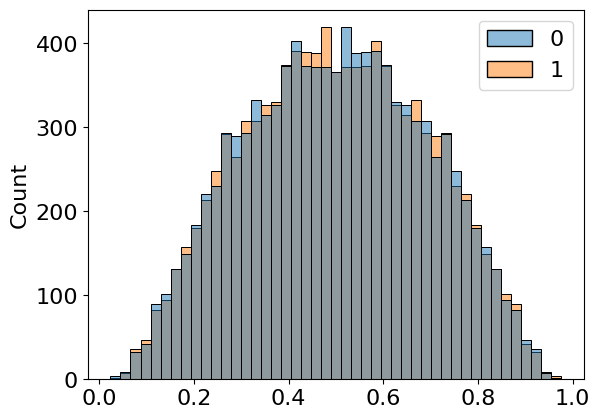

In [ ]:
sns.histplot(logit_cls.predict_proba(X_train))

In [ ]:
weighted_lrg = LogisticRegression(class_weight='balanced').fit(X_train, y_train)

y_pred = weighted_lrg.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

Accuracy:  0.4970845481049563
Precision:  0.0
Recall:  0.0
F1:  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/10 [00:00<?, ?it/s]

RandomForestClassifier(n_estimators=50, random_state=42)

 10%|█         | 1/10 [00:01<00:10,  1.12s/it]

RandomForestClassifier(random_state=42)

 20%|██        | 2/10 [00:03<00:15,  1.97s/it]

RandomForestClassifier(n_estimators=150, random_state=42)

 30%|███       | 3/10 [00:08<00:21,  3.06s/it]

RandomForestClassifier(n_estimators=200, random_state=42)

 40%|████      | 4/10 [00:15<00:28,  4.79s/it]

RandomForestClassifier(n_estimators=250, random_state=42)

 50%|█████     | 5/10 [00:21<00:26,  5.28s/it]

RandomForestClassifier(n_estimators=300, random_state=42)

 60%|██████    | 6/10 [00:29<00:25,  6.26s/it]

RandomForestClassifier(n_estimators=350, random_state=42)

 70%|███████   | 7/10 [00:33<00:16,  5.59s/it]

RandomForestClassifier(n_estimators=400, random_state=42)

 80%|████████  | 8/10 [00:39<00:11,  5.61s/it]

RandomForestClassifier(n_estimators=450, random_state=42)

 90%|█████████ | 9/10 [00:45<00:05,  5.53s/it]

RandomForestClassifier(n_estimators=500, random_state=42)

100%|██████████| 10/10 [00:51<00:00,  5.19s/it]


Text(0.5, 0, 'n_estimators')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Accuracy vs. n_estimators')

Text(0.5, 0, 'n_estimators')

Text(0, 0.5, 'Precision')

Text(0.5, 1.0, 'Precision vs. n_estimators')

Text(0.5, 0, 'n_estimators')

Text(0, 0.5, 'Recall')

Text(0.5, 1.0, 'Recall vs. n_estimators')

Text(0.5, 0, 'n_estimators')

Text(0, 0.5, 'F1-score')

Text(0.5, 1.0, 'F1-score vs. n_estimators')

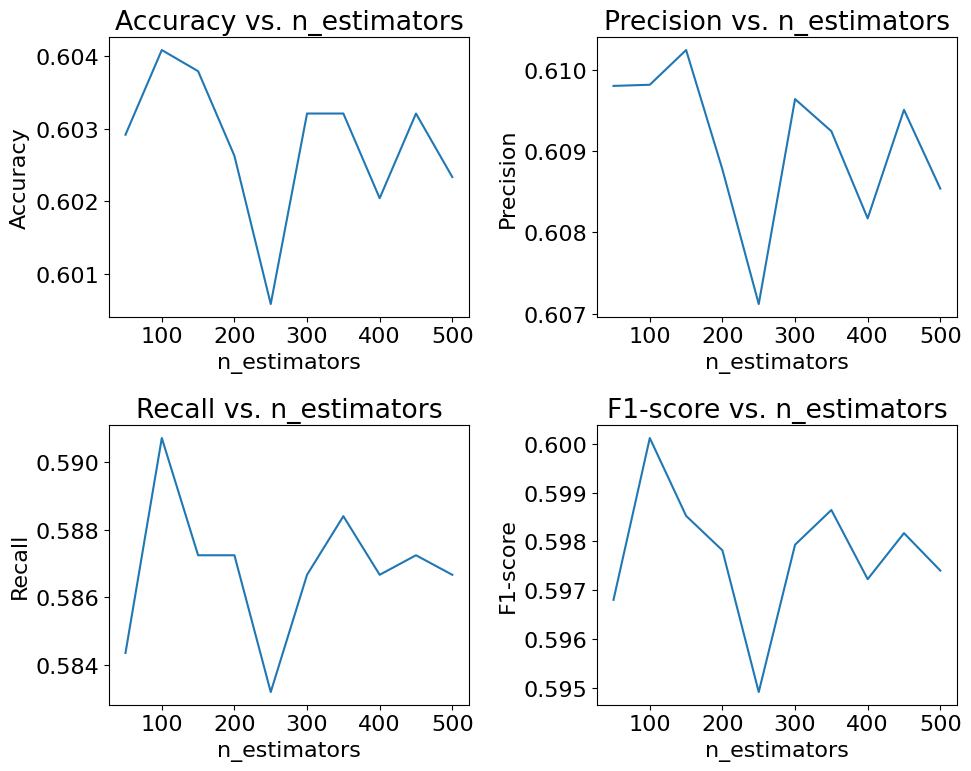

In [ ]:
# Define the range of n_estimators values
n_estimators_range = range(50, 501, 50)

# Create empty lists to store the evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Loop through the n_estimators values
for n_estimators in tqdm(n_estimators_range):
    # Create a Random Forest classifier with the current n_estimators value
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Train the classifier
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_classifier.predict(X_test)

    # Calculate the evaluation metrics and append them to the respective lists
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot the accuracy scores
axs[0, 0].plot(n_estimators_range, accuracy_scores)
axs[0, 0].set_xlabel('n_estimators')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].set_title('Accuracy vs. n_estimators')

# Plot the precision scores
axs[0, 1].plot(n_estimators_range, precision_scores)
axs[0, 1].set_xlabel('n_estimators')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].set_title('Precision vs. n_estimators')

# Plot the recall scores
axs[1, 0].plot(n_estimators_range, recall_scores)
axs[1, 0].set_xlabel('n_estimators')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].set_title('Recall vs. n_estimators')

# Plot the F1-scores
axs[1, 1].plot(n_estimators_range, f1_scores)
axs[1, 1].set_xlabel('n_estimators')
axs[1, 1].set_ylabel('F1-score')
axs[1, 1].set_title('F1-score vs. n_estimators')

plt.tight_layout()
plt.show()


In [ ]:
!pip install sealion

Compiling cython. Please wait...
Confusion Matrix:
[[1054.  651.]
 [ 713. 1012.]]

True Positives (TP): 1012.0
True Negatives (TN): 1054.0
False Positives (FP): 651.0
False Negatives (FN): 713.0
Accuracy: 0.602332361516035


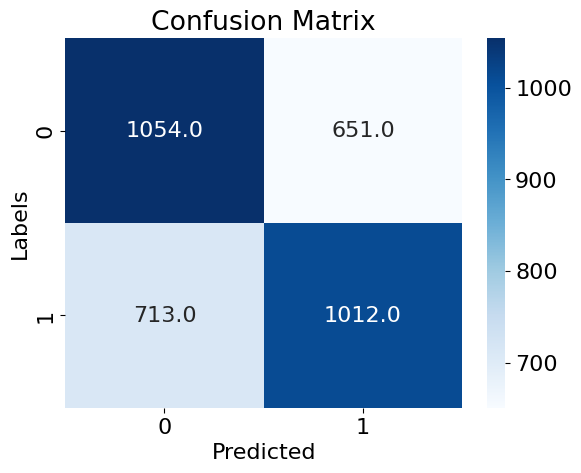

In [ ]:
# confusion_matrix(y_pred, y_test)

from sealion.utils import confusion_matrix
import numpy as np

# Assuming your confusion_matrix function returns a numpy array
conf_matrix = confusion_matrix(y_pred, y_test)

# Extracting values from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Printing the confusion matrix along with labels
print("Confusion Matrix:")
print(conf_matrix)
print("")

# Calculating accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Printing labels and values
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)
print("Accuracy:", accuracy)


**Logistic Regression Summary**
*   Accuracy:  0.6158038147138964
*   Precision:  0.6569920844327177
* Recall:  0.6209476309226932
* F1:  0.6384615384615385

An accuracy score of 0.61 means that 61% of our forecasts were correct in relation to the total number of guesses. A precision score of 0.65 means that our model correctly predicts 65% of forecasts in the positive direction (the team wins). A recall score of 0.62 describes the ratio tp/(tp + fn) where tp is the number of true positives and fn is the number of false negatives. It is a way of quantifying our model's ability of correctly identifying the positive class instances and is especially important when the cost of false negatives is high (i.e. predicting cancer from healthcare data).

Because we are trying to predict the winning team of games and there is no real cost to having false negatives, it is best to optimize the model for precision and not recall.

Our F1 score of 0.63 indicates that the model can be further optimized to yield better results. Currently, our indicator scores are in the 0.60-0.65 range and it would be better to bring the model to let's say, 0.70-0.80 range. The minimum score that we are willing to accept is 0.50 because if a fully random W/L prediction should result in a 0.50 accuracy rating for a binary variable.

Let's explore more models and see if we can get a better precision score.

## Lasso and Ridge models

In [ ]:
## Applying Lasso and Ridge to the dataset

# Perform feature selection using Lasso or Ridge regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
selected_features_lasso = X_train.columns[lasso.coef_ != 0]

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
selected_features_ridge = X_train.columns[ridge.coef_ > 0.1]  # Adjust the threshold as needed

# Train a Random Forest classifier using the selected features
rf_classifier_lasso = RandomForestClassifier(n_estimators=300, random_state=SEED)
rf_classifier_lasso.fit(X_train[selected_features_lasso], y_train)

rf_classifier_ridge = RandomForestClassifier(n_estimators=300, random_state=SEED)
rf_classifier_ridge.fit(X_train[selected_features_ridge], y_train)

Lasso(alpha=0.1)

Ridge(alpha=0.1)

RandomForestClassifier(n_estimators=300, random_state=24)

RandomForestClassifier(n_estimators=300, random_state=24)

In [ ]:
# Make predictions on the test set
y_pred_lasso = rf_classifier_lasso.predict(X_test[selected_features_lasso])

accuracy_score(y_test, y_pred_lasso)

print('Accuracy: ', accuracy_score(y_test, y_pred_lasso))
print('Precision: ', precision_score(y_test, y_pred_lasso))
print('Recall: ', recall_score(y_test, y_pred_lasso))
print('F1: ', f1_score(y_test, y_pred_lasso))

0.5533527696793002

Accuracy:  0.5533527696793002
Precision:  0.5568650559811432
Recall:  0.5478260869565217
F1:  0.5523085914669783


Confusion Matrix:
[[953. 752.]
 [780. 945.]]

True Positives (TP): 945.0
True Negatives (TN): 953.0
False Positives (FP): 752.0
False Negatives (FN): 780.0
Accuracy: 0.5533527696793002
True Positive Rate (TPR): 0.5478260869565217
True Negative Rate (TNR): 0.5589442815249267
False Positive Rate (FPR): 0.4410557184750733
False Negative Rate (FNR): 0.45217391304347826


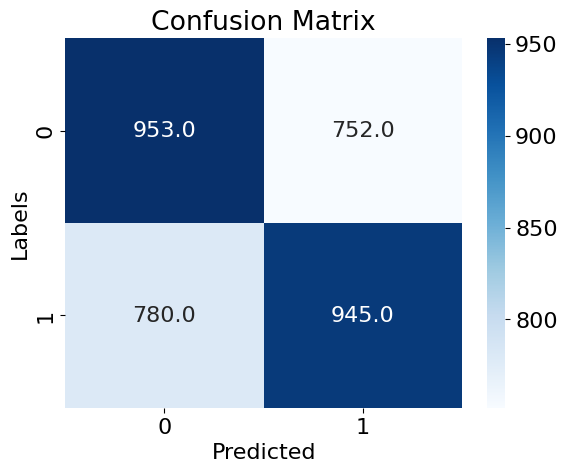

In [ ]:
conf_matrix = confusion_matrix(y_pred_lasso, y_test)
tn, fp, fn, tp = conf_matrix.ravel()
total_samples = len(y_test)

print("Confusion Matrix:")
print(conf_matrix)
print("")

accuracy = (tp + tn) / total_samples
true_positive_rate = tp / (tp + fn)
true_negative_rate = tn / (tn + fp)
false_positive_rate = fp / (fp + tn)
false_negative_rate = fn / (fn + tp)

print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)
print("Accuracy:", accuracy)
print("True Positive Rate (TPR):", true_positive_rate)
print("True Negative Rate (TNR):", true_negative_rate)
print("False Positive Rate (FPR):", false_positive_rate)
print("False Negative Rate (FNR):", false_negative_rate)


In [ ]:
import matplotlib.pyplot as plt

# Fit Lasso and Ridge regression models
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Predict target variable for training and testing data
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)


Lasso(alpha=0.1)

Ridge(alpha=0.1)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred_lasso)
mse = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lasso)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 0.4466472303206997
Mean Squared Error (MSE): 0.4466472303206997
Root Mean Squared Error (RMSE): 0.6683167140815047
R-squared (R2): -0.7866496663691616


<Figure size 1200x600 with 0 Axes>

<Axes: ylabel='WL'>

<Axes: ylabel='WL'>

Text(0.5, 1.0, 'Residual Plot - Lasso Regression')

Text(0.5, 0, 'Predicted Values')

Text(0, 0.5, 'Residuals')

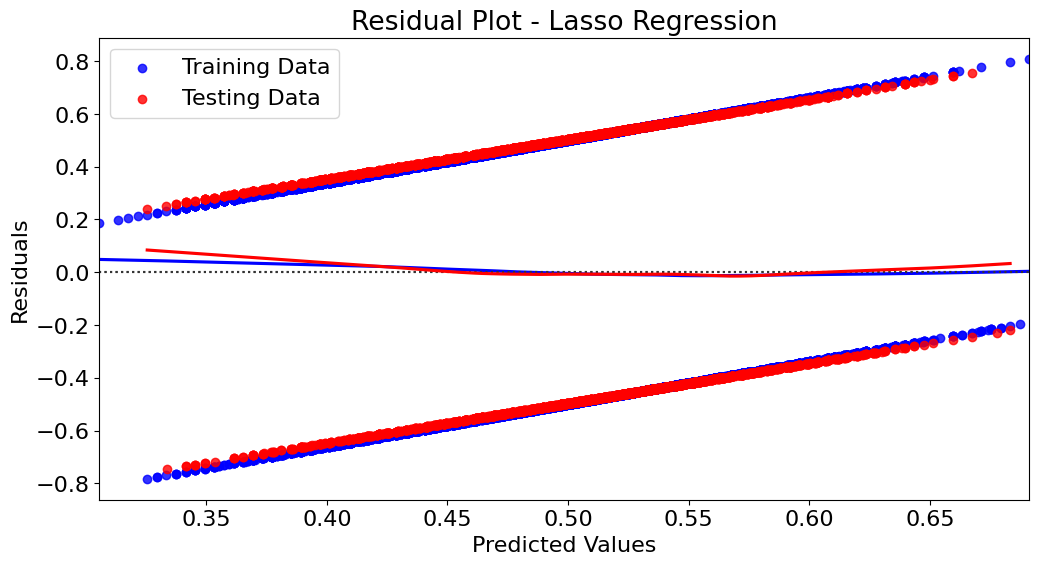

<Figure size 1200x600 with 0 Axes>

<Axes: ylabel='WL'>

<Axes: ylabel='WL'>

Text(0.5, 1.0, 'Residual Plot - Ridge Regression')

Text(0.5, 0, 'Predicted Values')

Text(0, 0.5, 'Residuals')

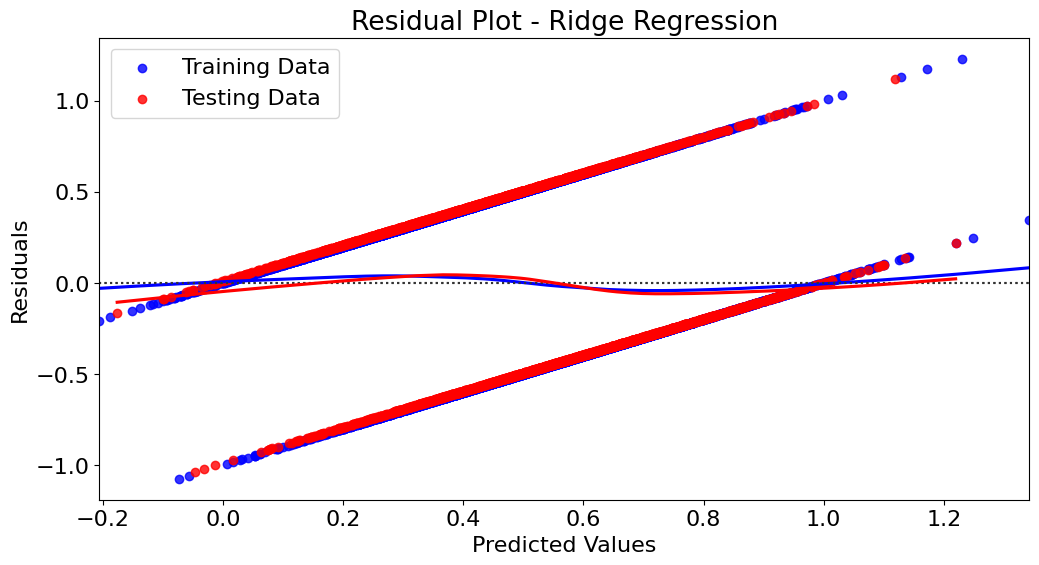

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='WL', ylabel='Count'>

<Axes: xlabel='WL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Residuals - Lasso Regression')

Text(0.5, 0, 'Residuals')

Text(0, 0.5, 'Frequency')

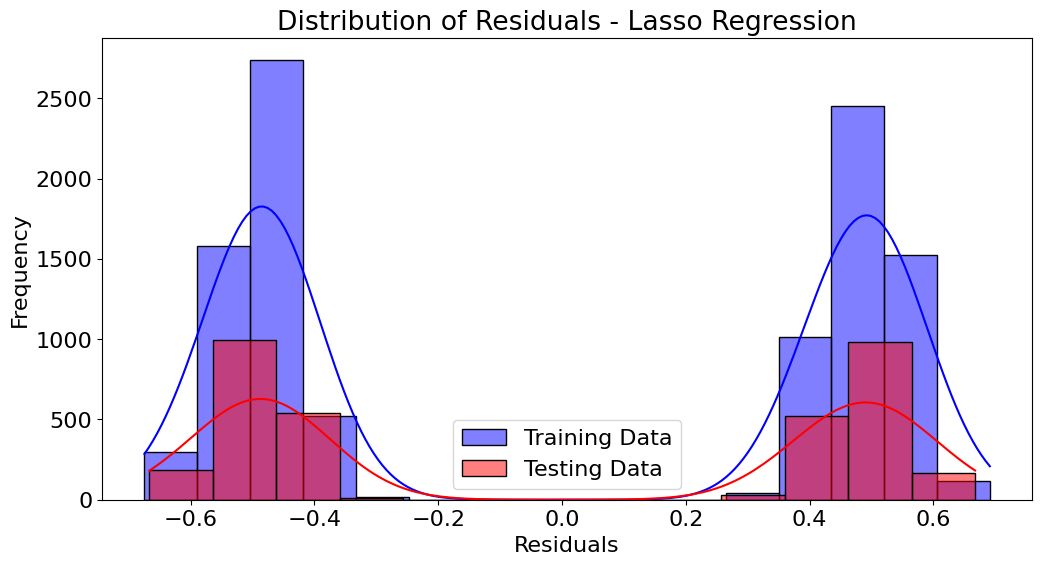

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='WL', ylabel='Count'>

<Axes: xlabel='WL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Residuals - Ridge Regression')

Text(0.5, 0, 'Residuals')

Text(0, 0.5, 'Frequency')

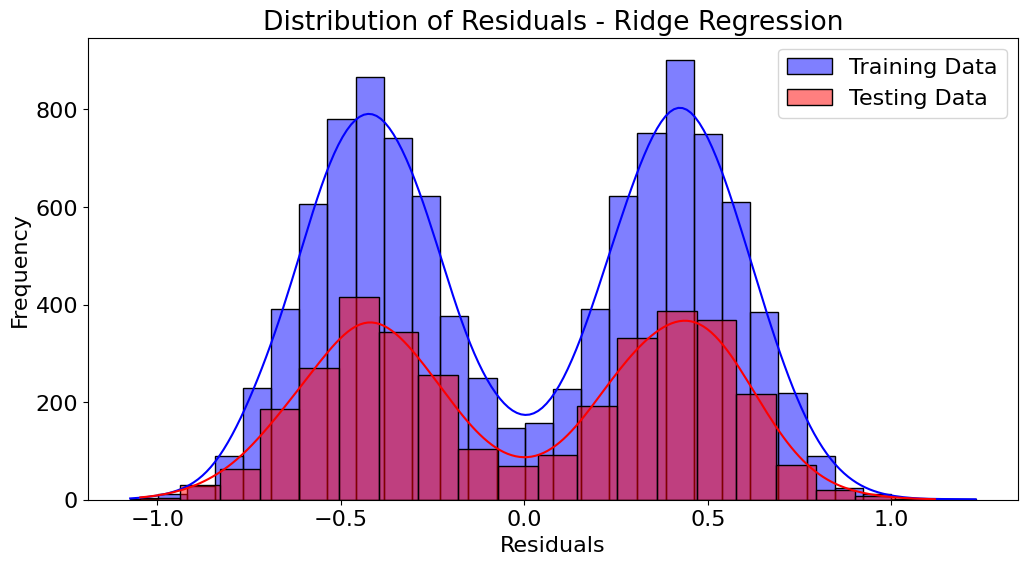

<Figure size 1200x1000 with 0 Axes>

Text(0.5, 52.7222222222222, 'Actual Target')

Text(49.222222222222214, 0.5, 'Predicted Target')

Text(0.5, 1.0, 'Joint Plot - Lasso Regression')

<Figure size 1200x1000 with 0 Axes>

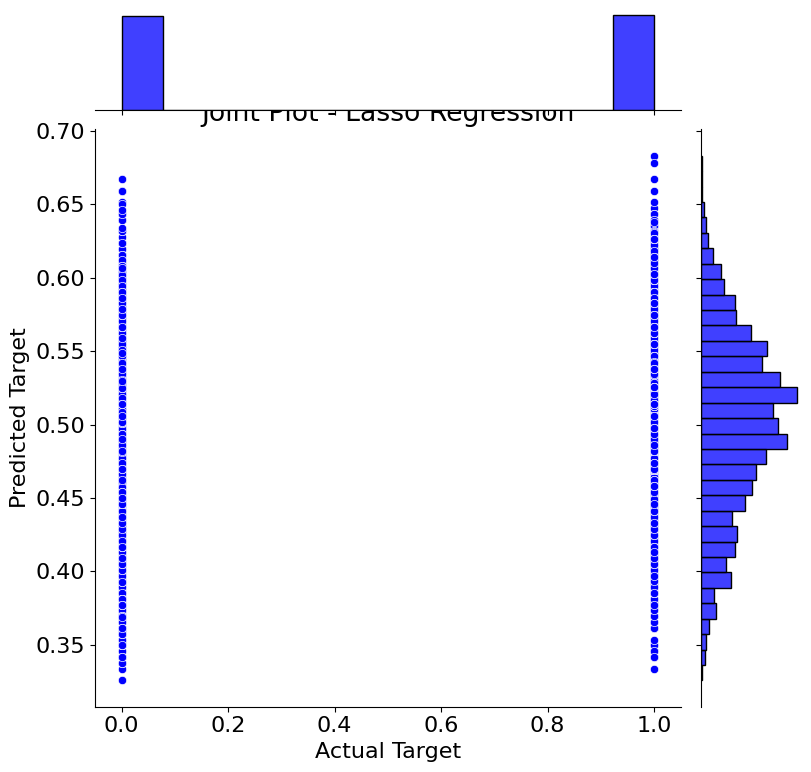

<Figure size 1200x1000 with 0 Axes>

Text(0.5, 52.7222222222222, 'Actual Target')

Text(49.222222222222214, 0.5, 'Predicted Target')

Text(0.5, 1.0, 'Joint Plot - Ridge Regression')

<Figure size 1200x1000 with 0 Axes>

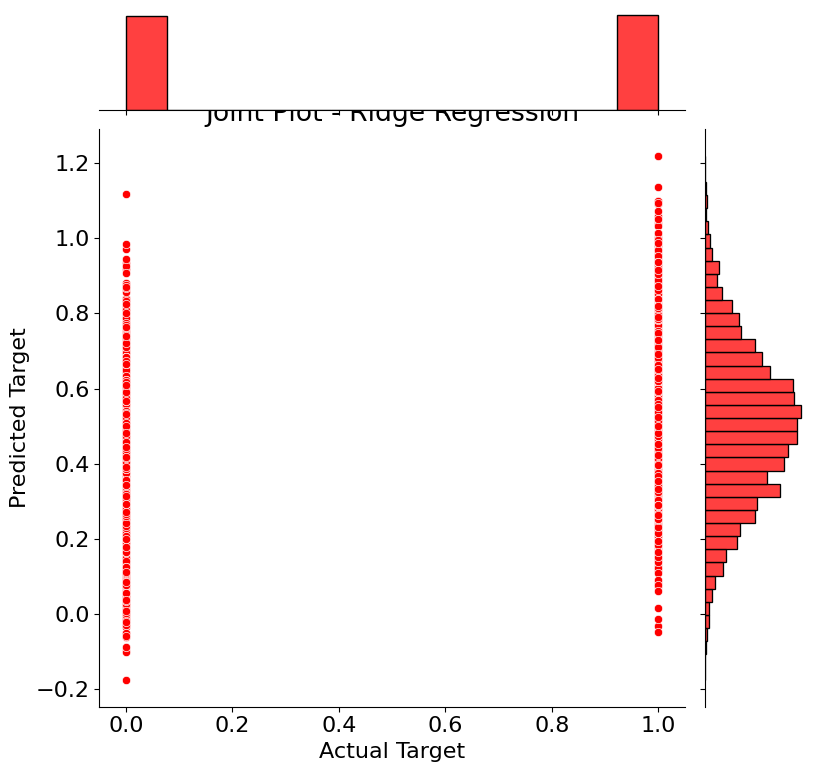

In [ ]:
import seaborn as sns

# Residual Plot for Lasso
plt.figure(figsize=(12, 6))
sns.residplot(x=y_pred_train_lasso, y=y_pred_train_lasso - y_train, lowess=True, color="blue", label="Training Data")
sns.residplot(x=y_pred_test_lasso, y=y_pred_test_lasso - y_test, lowess=True, color="red", label="Testing Data")
plt.title("Residual Plot - Lasso Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend()
plt.show()

# Residual Plot for Ridge
plt.figure(figsize=(12, 6))
sns.residplot(x=y_pred_train_ridge, y=y_pred_train_ridge - y_train, lowess=True, color="blue", label="Training Data")
sns.residplot(x=y_pred_test_ridge, y=y_pred_test_ridge - y_test, lowess=True, color="red", label="Testing Data")
plt.title("Residual Plot - Ridge Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend()
plt.show()

# Distribution Plot for Lasso
plt.figure(figsize=(12, 6))
sns.histplot((y_pred_train_lasso - y_train), kde=True, color="blue", label="Training Data")
sns.histplot((y_pred_test_lasso - y_test), kde=True, color="red", label="Testing Data")
plt.title("Distribution of Residuals - Lasso Regression")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Distribution Plot for Ridge
plt.figure(figsize=(12, 6))
sns.histplot((y_pred_train_ridge - y_train), kde=True, color="blue", label="Training Data")
sns.histplot((y_pred_test_ridge - y_test), kde=True, color="red", label="Testing Data")
plt.title("Distribution of Residuals - Ridge Regression")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Joint Plot for Lasso
plt.figure(figsize=(12, 10))
sns.jointplot(x=y_test, y=y_pred_test_lasso, kind='scatter', color='blue', height=8)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Joint Plot - Lasso Regression')
plt.show()

# Joint Plot for Ridge
plt.figure(figsize=(12, 10))
sns.jointplot(x=y_test, y=y_pred_test_ridge, kind='scatter', color='red', height=8)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Joint Plot - Ridge Regression')
plt.show()


## Decision Trees (Ignore; It takes too long)


In [ ]:
from sealion.decision_trees import DecisionTree

In [ ]:
dt = DecisionTree()
dt.fit(X_train, y_train)

In [ ]:
def evaluate(dt, X_train, y_train, X_test, y_test) :
    print("Training accuracy : ", dt.evaluate(X_train, y_train))
    print("Testing accuracy : ", dt.evaluate(X_test, y_test))

evaluate(dt, X_train, y_train, X_test, y_test)

Training accuracy :  0.973853032659409
Testing accuracy :  0.5836734693877551


In [ ]:
average_branches = dt.average_branches() # this is one of the stuff other libs don't do
average_branches

20.323529411764707

In [ ]:
# looks like we have 7 branches in total. Maybe we can add a max_branches = 4 term
dt = DecisionTree(max_branches = 3)
dt.fit(X_train, y_train)
evaluate(dt, X_train, y_train, X_test, y_test)

In [ ]:
dt = DecisionTree(max_branches = 4, min_samples = 10)
dt.fit(X_train, y_train)
evaluate(dt, X_train, y_train, X_test, y_test)

In [ ]:
from sealion.utils import confusion_matrix
y_pred = dt.predict(X_test)
confusion_matrix(y_pred, y_test)

## Random Forest (Ignore; It takes too long)

In [ ]:
from sealion.ensemble_learning import RandomForest, EnsembleClassifier

In [ ]:
rf = RandomForest(num_classifiers = 20,  replacement = True, min_data = 50)
rf.fit(X_train, y_train)

In [ ]:
print("Validation accuracy : ", rf.evaluate(X_test, y_test))
rf.visualize_evaluation(rf.predict(X_test), y_test.values)


In [ ]:
from sealion.decision_trees import DecisionTree
best_tree = rf.give_best_tree(X_test, y_test) # get the best tree of off the data you give it
dt = DecisionTree()
dt.give_tree(best_tree) # enter the best tree trained from the random forests
dt.evaluate(X_test, y_test) # see how well that best tree in random forests did

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
X, y = make_blobs(500, random_state = 2, centers = 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 3)

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X[:, 0], X[:, 1])
plt.title("Blobs Dataset")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

## Linear Regression

In [ ]:
lin_reg = LinearRegression() # no arguments
lin_reg.fit(X_train, y_train)

In [ ]:
r_squared = lin_reg.evaluate(X_test, y_test) # will see the r^2 value of its predictions on X_test
# and y_test

print("R^2 : ", r_squared) # negative r squared is really bad

In [ ]:
y_pred = lin_reg.predict(X_test) # get the predictions
lin_reg.visualize_evaluation(y_pred, y_test)

## Gradient Boosting Machines

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=SEED)

# Create the XGBoost model
model = xgb.XGBClassifier(
    objective='binary:logistic',  # Change this for different objectives (e.g., 'multi:softmax' for multiclass)
    eval_metric='logloss',  # Choose an appropriate evaluation metric
    use_label_encoder=False,  # Suppress warning for label encoder (if using scikit-learn 1.0+)
    n_estimators=100,  # Number of boosting rounds
    learning_rate=0.1,  # Learning rate
    max_depth=6,  # Maximum depth of a tree
    random_state=SEED
)

# Train the model
model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10, verbose=True)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print(classification_report(y_val, y_pred))

# You can make predictions on new data using the trained model
# new_data_predictions = model.predict(new_data)


In [ ]:
from sklearn.datasets import load_iris  # Example dataset
from sklearn.metrics import accuracy_score


# Calculate the most common class in the training data
from collections import Counter
most_common_class = Counter(y_train).most_common(1)[0][0]

# Calculate baseline accuracy
baseline_predictions = [most_common_class] * len(y_test)
baseline_accuracy = accuracy_score(y_test, baseline_predictions)

print(f"Baseline Accuracy: {baseline_accuracy:.4f}")
